Robert Garbutt 
Section 101

# Homework 5: Statistics, Fitting

##### ** Submit this notebook to bourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Homework05.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident. You may also recognize this dataset from Homework04. That's not an accident either.]

You are given a dataset (peak.dat) from a gamma-ray experiment consisting of ~1000 hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray. We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Fit the distribution to a Gaussian function using an unbinned fit (<i>Hint:</i> use <tt>scipi.stats.norm.fit()</tt> function, see for example Lecture05.ipynb), and compare the parameters of the fitted Gaussian with the mean and standard deviation computed in Homework04
1. Fit the distribution to a Gaussian function using a binned least-squares fit (<i>Hint:</i> use <tt>scipy.optimize.curve_fit()</tt> function, see Lecture05.ipynb for example), and compare the parameters of the fitted Gaussian and their uncertainties to the parameters obtained in the unbinned fit above. 
1. Re-make your histogram from (1) with twice as many bins, and repeat the binned least-squares fit from (3) on the new histogram. How sensitive are your results to binning ? 
1. How consistent is the distribution with a Gaussian? In other words, compare the histogram from (1) to the fitted curve, and compute a goodness-of-fit value, such as $\chi^2$/d.f.


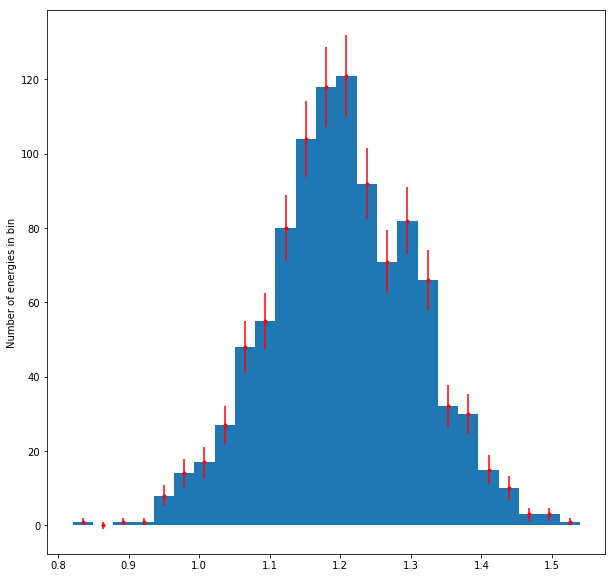

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.stats import norm

#Part 1.

energies = np.loadtxt('peak.dat')


plt.figure(figsize=(10,10))

hist, bin_edges,patches = plt.hist(energies, bins=25)

x = 0.5*(bin_edges[1:] + bin_edges[:-1])   #Error bars
err_y = np.sqrt(hist)
err_y = [max(error,1) for error in err_y]
plt.errorbar(x, hist, err_y, fmt='r.')
plt.ylabel('Number of energies in bin')



def model(x,A,mu,width):        #Forces a Gaussian fit
    return A*np.exp(-(x-mu)**2/(2*width**2))

plt.show()




Mean of dist: 1.202680265
Std of dist: 0.1037851246060088
The values are the same as expected


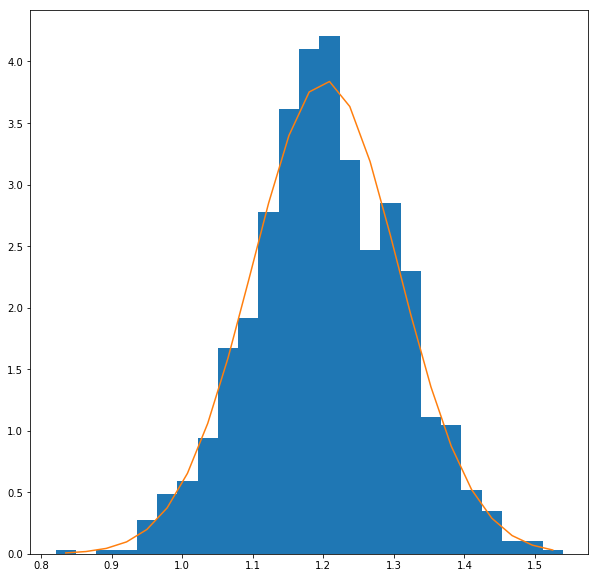

In [28]:
#Part 2
plt.figure(figsize=(10,10))

par = norm.fit(energies)
plt.hist(energies,density=True,bins=25)
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
plt.plot(x,pdf_fitted)
print('Mean of dist:',par[0])
print('Std of dist:',par[1])
print('The values are the same as expected')
old_par=par



plt.show()

Old Parameters
Mean of fit: 1.202680265
Std deviation of fit 0.1037851246060088

New parameters:
Mean of fit: 1.2036007664800348
Std deviation of fit 0.1028632365909459
The values only differ in the thousands place, otherwise they are very close.

chi^2 = 115342.20
chi^2/d.f. = 5242.83


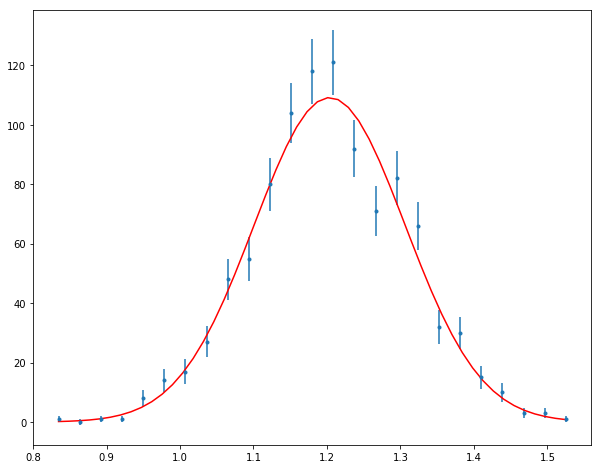

In [31]:
#Part 3 and 5.

par0 = np.array([100, 1.2, 0.05])
par, cov = fitter.curve_fit(model, x, hist, par0, err_y, absolute_sigma=True)
sigma = np.ones(len(hist))*par[2]
# print(opt_par)

# overlay plot over data
plt.figure(3, figsize=(10,8))
plt.errorbar(x, hist, xerr=0, yerr=err_y, fmt='.')
xfit = np.linspace(x[0], x[len(x)-1], endpoint=True)
plt.plot(xfit, model(xfit, par[0], par[1], par[2]), 'r-')

print('Old Parameters')
print('Mean of fit:',old_par[0])
print('Std deviation of fit',old_par[1])
print()
print('New parameters:')
print('Mean of fit:',par[1])
print('Std deviation of fit',par[2])
print('The values only differ in the thousands place, otherwise they are very close.')
print()
chi_squared = np.sum(((model(x, *par)-hist) / par[2])**2)
reduced_chi_squared = chi_squared / (len(x)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f. = {0:5.2f}'.format(reduced_chi_squared))

plt.show()

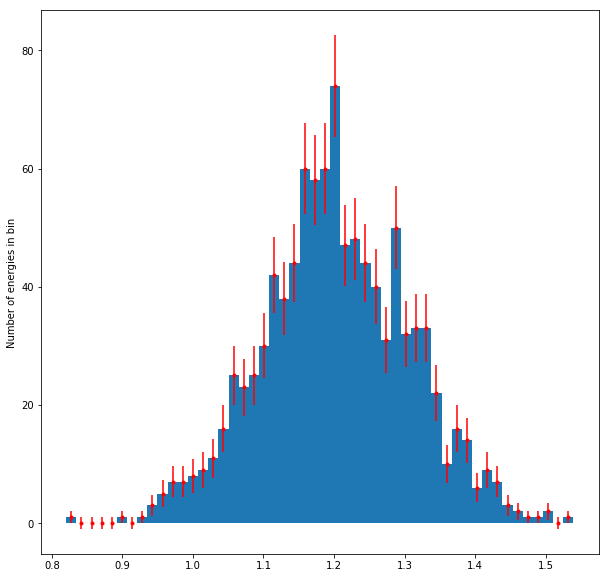

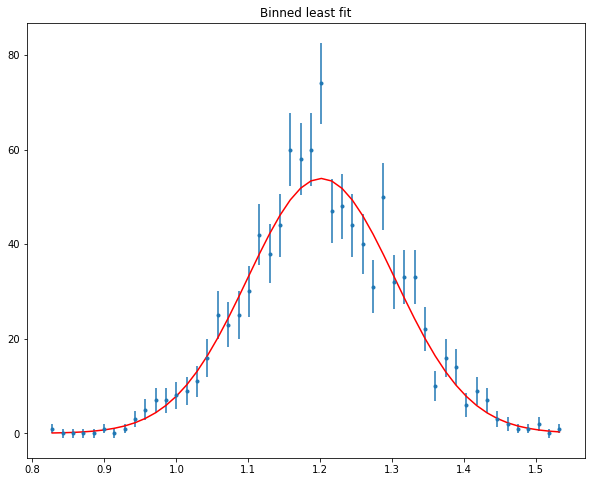

In [20]:
#Part 4
plt.figure(figsize=(10,10))

hist, bin_edges,patches = plt.hist(energies, bins=50)

x = 0.5*(bin_edges[1:] + bin_edges[:-1])   #Error bars
err_y = np.sqrt(hist)
err_y = [max(error,1) for error in err_y]
plt.errorbar(x, hist, err_y, fmt='r.')
plt.ylabel('Number of energies in bin')

par0 = np.array([100, 1.2, 0.05])
par, cov = fitter.curve_fit(model, x, hist, par0, err_y, absolute_sigma=True)
sigma = np.ones(len(hist))*par[2]
# print(opt_par)

# overlay plot over data
plt.figure(3, figsize=(10,8))
plt.errorbar(x, hist, xerr=0, yerr=err_y, fmt='.')
xfit = np.linspace(x[0], x[len(x)-1], endpoint=True)
plt.plot(xfit, model(xfit, par[0], par[1], par[2]), 'r-')
plt.title('Binned least fit')

print('It looks like the curve fit is very dependent upon the number of bins, this graph does not seem to fit very well.')

plt.show()

## Problem 2: Optical Pumping experiment

One of the experiments in the 111B (111-ADV) lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.
1. From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


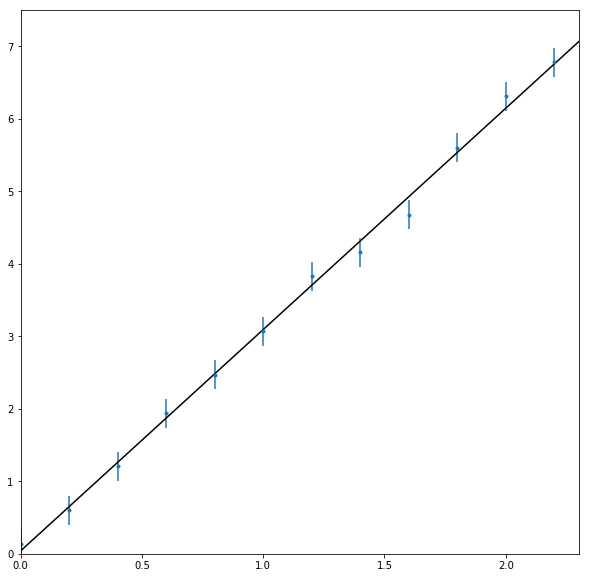

In [44]:
#part 1

I = np.array([i*0.2 for i in range(0,12)])
freq = np.array([0.14,0.60,1.21,1.94,2.47,3.07,3.83,4.16,4.68,5.60,6.31,6.78])
std = np.ones(len(I))*0.2

def model(x, a, b):
    return a + b*x


par0 = np.array([0.1, 2.0])
par, cov = fitter.curve_fit(model, I, freq, par0, std, absolute_sigma=True)
xvals = np.linspace(0, 2.5, len(I), endpoint=True)


plt.figure(figsize=(10, 10)) #Graph
plt.errorbar(I, freq, xerr=0, yerr=std, fmt='.')
plt.plot(xvals, model(xvals, par[0], par[1]), 'k')
plt.xlim(0, 2.3)
plt.ylim(0, 7.5)

plt.show()

In [51]:
#Part 2
partner_std = std[:]*0.01

par, cov = fitter.curve_fit(model, I, freq, par0, partner_std, absolute_sigma=True)

dof = len(I) - len(par)
chi_squared = np.sum(((model(I, *par)-freq)/partner_std)**2)
r_chi_squared = (chi_squared)/dof

print('Using partners uncertainty = 0.01')
print('chi^2 = {0:5.2f}'.format(chi_squared))
print('chi^2/d.f. = {0:5.2f}'.format(r_chi_squared))
print('Degrees of freedom = {0:5.2f}'.format(dof))

print('p_value =', 1 - norm.cdf(chi_squared, dof))
print('Since the p_value is zero, there is no correlation between the data, ergo bad guess.')

Using partners uncertainty = 0.01
chi^2 = 37949.80
chi^2/d.f. = 3794.98
Degrees of freedom = 10.00
p_value = 0.0
Since the p_value is zero, there is no correlation between the data, ergo bad guess.


In [53]:
#part 3, same as before
new_std = np.ones(len(I))

par, cov = fitter.curve_fit(model, I, freq, par0, new_std, absolute_sigma=True)

dof = len(I) - len(par)
chi_squared = np.sum(((model(I, *par)-freq)/new_std)**2)
r_chi_squared = (chi_squared)/dof

print('New uncertainty = 1')
print('chi^2 = {0:5.2f}'.format(chi_squared))
print('chi^2/d.f. = {0:5.2f}'.format(r_chi_squared))
print('Degrees of freedom = {0:5.2f}'.format(dof))

print('p_value =', 1 - norm.cdf(chi_squared, dof))
print('100% correlation')

Using partners uncertainty = 0.01
chi^2 =  0.15
chi^2/d.f. =  0.02
Degrees of freedom = 10.00
p_value = 1.0
Since the p_value is zero, there is no correlation between the data, ergo bad guess.
